# Aumentar ingresos con Test A/B

Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.
Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

# Descripción de los datos

**Datos utilizados en la primera parte del proyecto**:

La tabla `hypotheses` contiene las hipótesis declaradas por el departamento de Marketing y sus calificaciones:
- **Hypotheses**: breves descripciones de las hipótesis
- **Reach**: alcance del usuario, en una escala del uno a diez
- **Impact**: impacto en los usuarios, en una escala del uno al diez
- **Confidence**: confianza en la hipótesis, en una escala del uno al diez
- **Effort**: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
plt.rcParams.update({'figure.figsize':(15,5)})
pd.set_option('mode.chained_assignment', None)
import scipy.stats as stats

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

## Priorizar hipótesis

El archivo `hypotheses_us.csv` contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con `Reach`, `Impact`, `Confidence` y `Effort` especificados para cada una.

Usaremos los Frameworks ICE y RICE. Los nombres de cada Framework hacen referencia a los parámetros que usan para el cálculo de priorización. Los parámetros de ICE son `Impact`, `Confidence` y `Effort`. Los de RICE son los mismos que ICE más el parámentro `Reach`.

### Framework ICE

In [3]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
hypotheses['ice'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses = hypotheses.sort_values(by='ice', ascending=False)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ice
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


Con el Framework ICE vemos que la hipótesis marcada con el índice 8 `Launch a promotion that gives users discounts on their birthdays` es la mejor. Seguido de los índices 0 y 7.

### Framework RICE

In [5]:
hypotheses['rice'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses = hypotheses.sort_values(by='rice', ascending=False)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ice,rice
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


Otra historia es la que se cuenta con el Framework RICE. Vemos que el índice 8, que antes ocupaba el primer lugar, ahora se encuentra en la quinta posición. Con este Framework, la hipótesis con el índice 7 `Add a subscription form to all the main pages. This will help you compile a mailing list.` fue la mejor, seguidos de los índices 2 y 0.

### ICE vs RICE

Al comparar ambos métodos, podemos obsevar el gran impacto que tiene el usar el parámetro "Reach" sobre el método RICE.

Se puede observar como la hipótesis `Launch a promotion that gives users discounts on their birthdays`, que en el método ICE era la número 1, pasó a ser la número 5 en el método RICE. La prioridad de las hipótesis cambio radicalmente de un método a otro. 

## Análsis de Test A/B

**Datos utilizados en la segunda parte del proyecto**:

La tabla `orders` contiene todas las ordenes hechas junto con información relevante de cada una:
- **transactionId**: identificador de pedido
- **visitorId**: identificador del usuario que realizó el pedido
- **date**: fecha del pedido
- **revenue**: ingresos del pedido
- **group**: el grupo del test A/B al que pertenece el usuario

La tabla `visits` contiene las visitas por cliente:
- **date**: la fecha
- **group**: grupo del test A/B
- **visits**: el número de visitas en la fecha especificada para el grupo de test A/B especificado

In [6]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [7]:
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [8]:
orders.info()
print()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Ahora, pasamos a estudiar los datos de `orders` y `visits` rápidamente para ver si se nota alguna anomalía con las tablas.

Al ver ambas tablas, vemos nada extraño a excepción de los tipos de datos de algunas columnas. Pasaremos a corregirlas para evitar posibles complicaciones y empezaremos con el análisis.

In [9]:
orders['transactionId'] = orders['transactionId'].astype('str')
orders['visitorId'] = orders['visitorId'].astype('str')

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   object 
 1   visitorId      1197 non-null   object 
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), object(4)
memory usage: 46.9+ KB


Al ver los datos de la tabla `orders` vemos algo extraño. Algunos usuarios se encuentran tanto dentro del grupo A como del grupo B. Ejemplo, el siguiente usuario:

In [11]:
orders[orders['visitorId'] == '963407295']

,transactionId,visitorId,date,revenue,group
20,2904772834,963407295,2019-08-15,5.6,B
1183,1458356232,963407295,2019-08-14,80.0,A


Esto no es bueno para el análisis ya que no puede haber el mismo usuario en ambos grupos. Para esto, pasaremos a eliminar aquellos usuarios que presenten esta característica. 

Haremos dos dataframes, una por cada grupo. Compararemos ambas y eliminaremos aquellos usuarios que se encuentren en ambas tablas.

In [12]:
a = orders[orders['group'] == "A"]
b = orders[orders['group'] == "B"]

In [13]:
a

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
10,3649131742,879864040,2019-08-15,65.7,A
12,2809384911,3213223594,2019-08-15,115.4,A
...,...,...,...,...,...
1187,2274188238,132143192,2019-08-14,15.5,A
1188,1692103379,1022829655,2019-08-14,5.7,A
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


Haciendo uso de la función `set()` y sacando la diferencia simétrca se puede obrener una lista de todos los usuarios que solamente se encuentran en una u otra lista. De esta forma podemos excluir aquellos usuarios que se encuentran en ambas bases de datos.

In [14]:
c = set(a['visitorId']) ^ set(b['visitorId'])
c

{'1002877908',
 '1009464434',
 '1010866419',
 '1011231197',
 '1016890234',
 '1022829655',
 '1028756448',
 '102981183',
 '1035424004',
 '104602633',
 '1046398313',
 '1049627981',
 '1052142804',
 '1060341621',
 '1064078146',
 '1069983096',
 '1070130208',
 '1075551409',
 '109615108',
 '1097629811',
 '1100237501',
 '1110007955',
 '1110543778',
 '1111826046',
 '1117202045',
 '1122598516',
 '1129369369',
 '113298937',
 '1143609305',
 '114507418',
 '1147554328',
 '1148665946',
 '1151477821',
 '1154728414',
 '1159489312',
 '1164614297',
 '11685486',
 '1172166732',
 '1174537443',
 '117599621',
 '1178217086',
 '1184607010',
 '1196621759',
 '1197745035',
 '1197773061',
 '1206072200',
 '1211585711',
 '1212176445',
 '1215602524',
 '1217561296',
 '1219079053',
 '1221478247',
 '1224575308',
 '1224903511',
 '1225835168',
 '1229532929',
 '1229866403',
 '1236388112',
 '1247895435',
 '1253370069',
 '1253818784',
 '1255412427',
 '1261629107',
 '1263373242',
 '1270030113',
 '1274716998',
 '1285103033',
 '1

Esta lista `c` la buscamos dentro de la tabla original `orders` para obtener, ahora sí, una tabla adecuada para poder trabajar con ella.

In [15]:
orders = orders.query('visitorId in @c')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [16]:
orders[orders['visitorId'] == '963407295']

,transactionId,visitorId,date,revenue,group


Podemos observar cómo el usuario ejemplo que se uso anteriormente ya no se encuentra dentro de la tabla `orders`.

### Ingreso acumulado por grupo

Una de las primeras cosas a calcular son los ingresos acumulados por grupo. 

Empezamos con cambiar el formato de la columna `date` en ambas tablas para poder hacer una recolección adecuada considerando los ingresos de cada día.

In [17]:
orders['date'] = orders['date'].map(lambda x : dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x : dt.datetime.strptime(x, '%Y-%m-%d'))

In [18]:
orders.info()
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   object        
 1   visitorId      1016 non-null   object        
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 47.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [19]:
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Creamos el df `datesGroups` en donde solamente se encuentran las columnas de fecha y grupo eliminando duplicados para tener solamente un grupo por fecha. 

Con esto, pasamos a agregar la cantidad de visitas, pedidos y ganancias por grupo en cada día.

In [20]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
       .agg({'date':'max', 'group':'max', 'transactionId':pd.Series.nunique, 'visitorId':pd.Series.nunique, 'revenue':'sum'}), 
                                     axis=1).sort_values(by=['date', 'group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1
...,...,...,...,...,...
533,2019-08-29,B,510,490,74576.7
757,2019-08-30,A,460,437,52363.7
690,2019-08-30,B,531,511,77863.5
958,2019-08-31,A,468,445,53212.0


Encontramos el número de pedidos, el número único de usuarios y la cantidad de las ganancias con la siguiente formula: `.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'})`

Aplicaremos los métodos a cada fila del DataFrame (`apply(axix=1)`) y ordenaremos los resultados por las columnas 'date' y 'group'.

Con este código, es como si hubiéramos estado calculando los resultados de nuestra prueba todos los días hasta la fecha actual y almacenándolos en las filas de la tabla ordersAggregated.

Vamos a hacer algo parecido para obtener los datos diarios acumulados agregados sobre los visitantes:

In [21]:
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
                                .agg({'date':'max', 'group':'max', 'visits':'sum'}), axis=1).sort_values(by=['date', 'group'])
visitsAggregated

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


Fusionamos las dos tablas en una y damos a sus columnas nombres descriptivos:

In [22]:
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']
cumulativeData

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,74576.7,17708
58,2019-08-30,A,460,437,52363.7,18037
59,2019-08-30,B,531,511,77863.5,18198
60,2019-08-31,A,468,445,53212.0,18736


Creemos gráficos de ingresos acumulados por día y grupo de prueba A/B:

In [23]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA

,date,revenue,orders
0,2019-08-01,2266.6,23
2,2019-08-02,3734.9,42
4,2019-08-03,5550.1,66
6,2019-08-04,6225.6,77
8,2019-08-05,7623.6,99
10,2019-08-06,8292.0,114
12,2019-08-07,10234.0,130
14,2019-08-08,11638.8,144
16,2019-08-09,13734.0,155
18,2019-08-10,16121.5,170


In [24]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB

,date,revenue,orders
1,2019-08-01,967.2,17
3,2019-08-02,3535.3,40
5,2019-08-03,4606.9,54
7,2019-08-04,6138.5,68
9,2019-08-05,7587.8,89
11,2019-08-06,10957.1,112
13,2019-08-07,14392.7,135
15,2019-08-08,16772.6,157
17,2019-08-09,18428.8,176
19,2019-08-10,20103.6,198


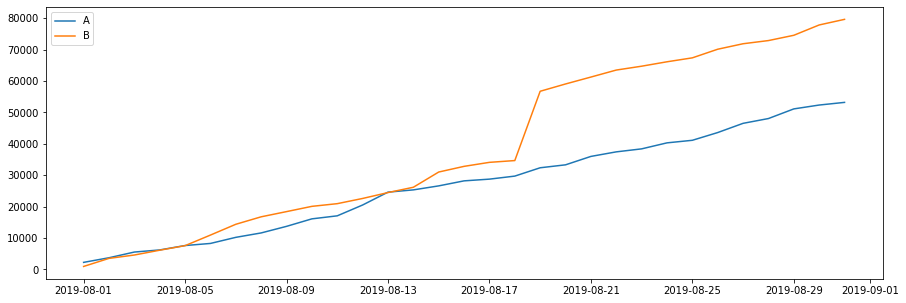

In [25]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()

Podemos observar que, en ambos casos, los ingresos aumentan. Lo curioso es ese gran salto que se presenta en el grupo B. Podría deberse a aumento en los pedidos o a algún pedido grande.

### Tamaño de pedido promedio acumulado por grupo

Vamos a trazar el tamaño promedio de compra por grupo. Vamos a dividir los ingresos acumulados entre el número acumulado de pedidos:

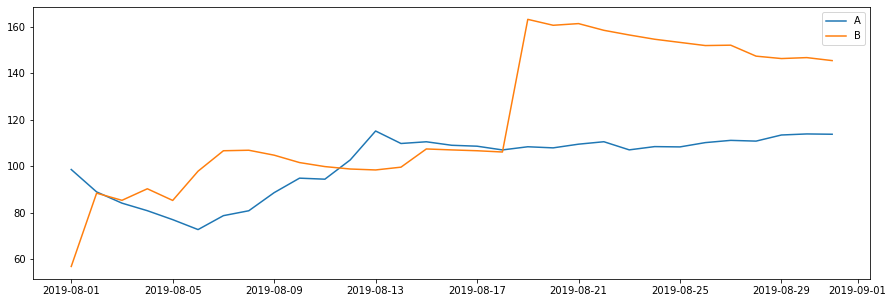

In [26]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

Podemos ver como en el caso del tamaño del pedido promedio existen muchos picos en ambos grupos. También se observa como el grupo A va ascendiendo hasta el 13 de Agosto y luego el valor se estabiliza entre 100 y 120 dolares. En cambio, el grupo B se encuentra un poco estable hasta después del 17 de Agosto, luego tiene un salto grande similar al visto en las ganancias acumuladas para luego empezar a bajar. 

Estaría bueno tener más valores de ambos grupos para poder terminar de definir el valor promedio correcto.

### Diferencia relativa en el tamaño de pedido promedio acumulado de B vs A

Vamos a trazar un gráfico de diferencia relativa para los tamaños promedio de compra. Agregaremos un eje horizontal con el método `axhline()`. 

In [27]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89
5,2019-08-06,8292.0,114,10957.1,112
6,2019-08-07,10234.0,130,14392.7,135
7,2019-08-08,11638.8,144,16772.6,157
8,2019-08-09,13734.0,155,18428.8,176
9,2019-08-10,16121.5,170,20103.6,198


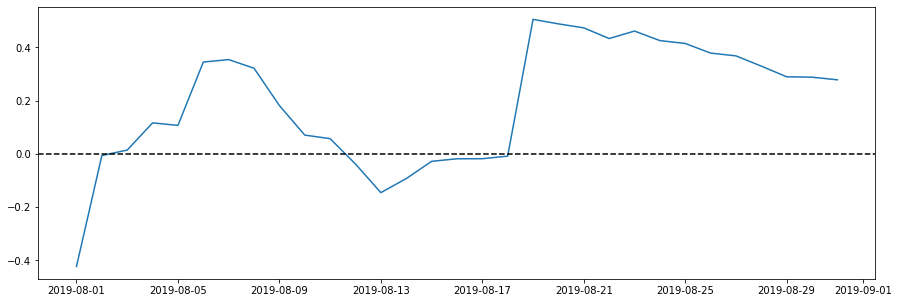

In [28]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')

Se puede observar que en algunos puntos de la gráfica la diferencia entre los grupos aumenta drásticamente. Esto nos dice que debe de haber valores atípicos que estén causando estos cambios.

### Tasa de conversión de A y B

Analizaremos el gráfico de conversión acumulada de forma similar que lo hecho anteriormente. Escalemos los ejes con el método `plt.axis()`, pasando los valores mínimo y máximo del eje X y los valores mínimo y máximo del eje Y al método.

In [29]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']
cumulativeData

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772
...,...,...,...,...,...,...,...
57,2019-08-29,B,510,490,74576.7,17708,0.028801
58,2019-08-30,A,460,437,52363.7,18037,0.025503
59,2019-08-30,B,531,511,77863.5,18198,0.029179
60,2019-08-31,A,468,445,53212.0,18736,0.024979


In [30]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataA

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
2,2019-08-02,A,42,36,3734.9,1338,0.031390
4,2019-08-03,A,66,60,5550.1,1845,0.035772
6,2019-08-04,A,77,71,6225.6,2562,0.030055
8,2019-08-05,A,99,92,7623.6,3318,0.029837
10,2019-08-06,A,114,104,8292.0,3985,0.028607
12,2019-08-07,A,130,120,10234.0,4629,0.028084
14,2019-08-08,A,144,133,11638.8,5239,0.027486
16,2019-08-09,A,155,143,13734.0,5856,0.026469
18,2019-08-10,A,170,158,16121.5,6262,0.027148


In [31]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeDataB

,date,group,orders,buyers,revenue,visits,conversion
1,2019-08-01,B,17,17,967.2,713,0.023843
3,2019-08-02,B,40,39,3535.3,1294,0.030912
5,2019-08-03,B,54,53,4606.9,1803,0.029950
7,2019-08-04,B,68,66,6138.5,2573,0.026428
9,2019-08-05,B,89,87,7587.8,3280,0.027134
11,2019-08-06,B,112,109,10957.1,3935,0.028463
13,2019-08-07,B,135,132,14392.7,4644,0.029070
15,2019-08-08,B,157,154,16772.6,5298,0.029634
17,2019-08-09,B,176,173,18428.8,5908,0.029790
19,2019-08-10,B,198,195,20103.6,6277,0.031544


(18109.0, 18139.0, 0.01, 0.04)

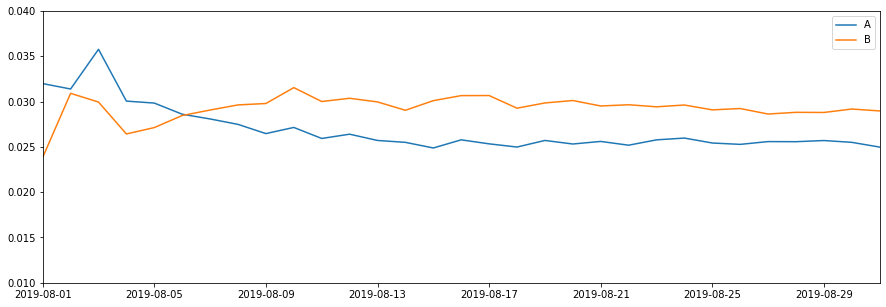

In [32]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0.01, 0.04])

En esta gráfica de las tasas de conversión de ambos grupos se puede observar cómo se ve irregularidad en ambos grupos para luego tener disminución en la conversión del grupo A para luego estabilizarse y un aumento en la tasa del grupo B para de igual manera también estabilizarse.

Vamos a trazar un gráfico de diferencia relativa para las tasas de conversión acumuladas:

In [33]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134
5,2019-08-06,0.028607,0.028463
6,2019-08-07,0.028084,0.029070
7,2019-08-08,0.027486,0.029634
8,2019-08-09,0.026469,0.029790
9,2019-08-10,0.027148,0.031544


(18109.0, 18139.0, -0.4, 0.4)

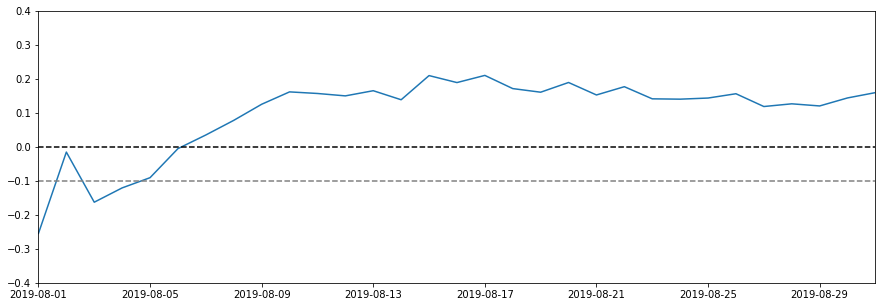

In [34]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime("2019-08-31"), -0.4, 0.4])

Al tener la gráfica de las diferencias relativas en las tasas de conversión podemos observar como el grupo B se encontraba por debajo del grupo A para luego igualarse el día 6 de Agosto (que es en donde la línea punteada y lo graficado se encuentran. Después de ese punto el grupo B se situa por encima del grupo A. Aún se pueden observar ciertas anomalías, pero dentro de cierta estabilidad.

De igual manera, habrá que analizar la información sin los datos anómalos y ver si hay cambios en las gráficas.

### Número de pedidos por usuarios

Los usuarios que realizan muchos pedidos inflan el numerador cuando calculamos la conversión. Su comportamiento probablemente difiere del patrón normal.

Habrá que conocer el número de pedidos que existen por usuario para poder encontrar el comportamiento normal de compra de los clientes en general y así poder definir qué es normal y qué crea ruido en los datos. 

In [35]:
ordersByUser = (orders.drop(['date', 'revenue', 'group'], axis=1)
                .groupby('visitorId', as_index=False)
                .agg({'transactionId':pd.Series.nunique})
                .sort_values(by='transactionId', ascending=False))
ordersByUser.columns = ['visitorId', 'orders']
ordersByUser

,visitorId,orders
507,2988190573,3
376,249864742,3
442,2742574263,3
274,2108163459,3
749,3967698036,3
...,...,...
332,2328378067,1
333,2328791559,1
334,233773277,1
335,235366767,1


Creamos el df `ordersByUser` en donde tenemos el número total de pedidos hecho por cada usuario. Se puede observar que el valor máximo es de 3 pedidos, mientras que el menor es de 1 pedido por usuario.

Pasamos a crear un gráfico de dispersión en donde el eje X será el número de usuarios y Y la cantidad de pedidos.

In [40]:
x_values = pd.Series(range(0,len(ordersByUser)))
x_values

0        0
1        1
2        2
3        3
4        4
      ... 
968    968
969    969
970    970
971    971
972    972
Length: 973, dtype: int64

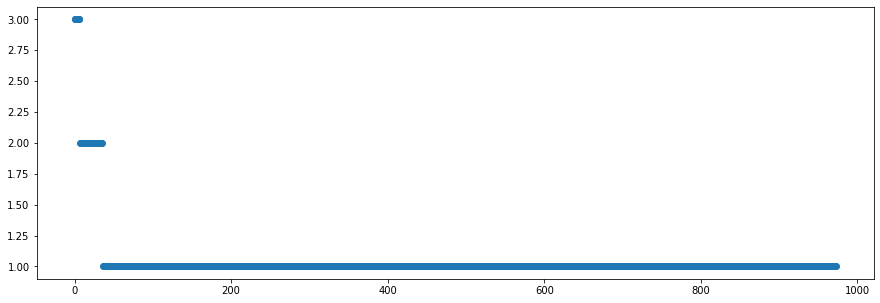

In [38]:
plt.scatter(x_values, ordersByUser['orders'])

De manera más sencilla se puede apreciar lo visto anteriormente. El mayor número de pedidos por usuario es 3 y el menor 1. Se puede notar la gran diferencia de usuarios que piden solo un artículo de los que piden más.

Es muy claro que los usuarioscon 2 o 3 pedidos causan ruido a los datos. Ahora pasaremos a calcular los percentiles para el número de pedidos normal por usuario.

### Percentiles 95 y 99 - Número de pedidos por usuario

In [39]:
np.percentile(ordersByUser['orders'], [95, 99])

array([1., 2.])

Teniendo lo de arriba, podemos concluir que el 5% de los usuarios piden más de 1 artículo y solo el 1% piden más de 2 artículos. En este caso, 3 pedidos.

Ahora haremos lo mismo con el número promedio de compra.

### Precios de los pedidos

In [41]:
x_values2 = pd.Series(range(0,len(orders['revenue'])))

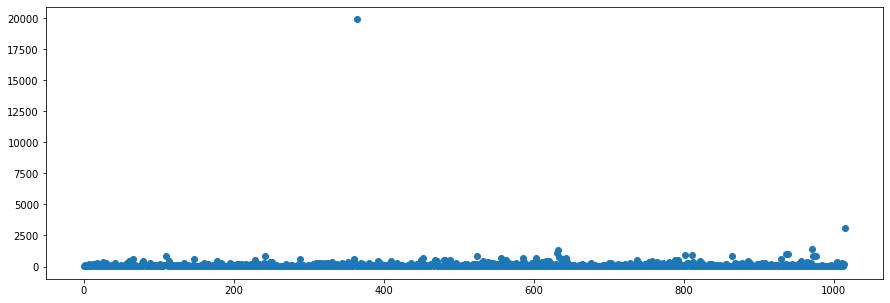

In [42]:
plt.scatter(x_values2, orders['revenue'])

Viendo el diagrama de dispersión de los precios por pedido se puede observar que son muy pocos aquellos que están fuera de lo normal. Habrá que recurrir a los percentiles para definir los valores exactos a partir de los cuáles se entiende como valor anormal.

### Percentiles 95 y 99 - Precios de los pedidos

In [43]:
np.percentile(orders['revenue'], [95, 99])

array([414.275, 830.3  ])

Los percentiles de los precios por pedido nos indican que 5% de las compras están por encima de los 414.275 dólares, mientras que el 1% está por encima de los 830.3 dólares.

### Significancia estadística con datos en bruto - Tasa de conversión A vs B

Vamos a buscar la significancia estadística de las diferencias en la tasa de conversión y el tamaño del pedido entre los grupos, utilizando los datos "sin procesar".

Primero calculamos el número de pedidos que hizo cada usuario dentro del grupo A solamente y luego les damos nombres más coherentes a las columnas. Luego haremos lo mismo para los clientes del grupo B.

In [44]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersA.sort_values(by='orders')

,visitorId,orders
0,1002877908,1
299,3476822370,1
297,3462462738,1
296,3451176495,1
295,343208965,1
...,...,...
119,2108163459,3
340,3908431265,3
394,611059232,3
347,3967698036,3


In [45]:
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

Ahora declararemos las variables sampleA y sampleB, con usuarios de diferentes grupos y números de pedidos correspondientes. Los que no pidieron nada tendrán un 0. Esto es necesario para preparar las muestras para la prueba de Mann-Whitney.

sampleA debe tener dos partes:
- Una lista del número de pedidos de cada usuario: `ordersByUsersA['orders']`
- Ceros para los usuarios que no pidieron nada. Su número es la diferencia entre el número total de visitantes y el número de registros de los pedidos: `visitors[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])`.

En pandas, las secuencias se concatenan con `pd.concat()`. Primero tenemos que pasarle lo que hay que concatenar. En nuestro caso es la lista de la primera y segunda parte.

Después, pasaremos el argumento que especifica que los objetos Series se concatenarán por fila: `pd.concat([...], axis=0)`. Esto es lo que obtenemos después de hacer lo mismo con sampleB.

In [47]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - 
                                                                    len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

Hemos utilizado la función `np.arange()` para crear una lista de índices. Funciona como la función `range()` pero crea una matriz de índices en el formato `np.array` requerido por `pd.Series`

In [48]:
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'B']
        ['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)
sampleB

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Name: orders, Length: 18916, dtype: int64

Para obtener la tasa de conversión del grupo, tendremos que dividir la suma de los pedidos entre la cantidad de usuarios. Con el método `mean()`, encontraremos la media para `sampleA`. Encontraremos la tasa de conversión para el grupo B de manera similar.

Vamos a imprimir la ganancia relativa de conversión para el grupo B: `conversión del grupo B / conversión del grupo A - 1`.

In [55]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print()
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01102

0.160


Viendo los resultados de esta sección, se puede concluir que la hipótesis nula se rechaza debido a que el valor p obtenido es menor que nuestro valor de alpha de 0.05. Esto nos dice que existe una diferencia estadísticamente significativa en la conversión entre ambos grupos. También, se puede observar que la ganancia de conversión relativa del grupo B, en comparación con el grupo A, es del 16%.

### Significancia estadística con datos en bruto - Tamaño promedio de pedido A vs B

Para calcular la importancia estadística de la diferencia en el tamaño medio de los pedidos de los segmentos, pasaremos los datos sobre los ingresos al criterio `mannwhitneyu()`.

También encontraremos la diferencia relativa en el tamaño promedio de pedido entre los grupos.

In [51]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print()
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean() /
                       orders[orders['group']=='A']['revenue'].mean()-1))

0.862
0.278


En este caso, el valor p es mucho mayor que alpha con 86.2%. En este caso, la hipótesis nula no se rechaza ya que no existe una diferencia estadísticamente significativa entre los tamaños de pedidos promedio de ambos grupos. No obstante, el tamaño promedio de pedido en el grupo B es 27.8% mayor que el del grupo A.

### Significancia estadística con datos filtrados - Tasa de conversión A vs B

Ahora toca analizar los datos, pero ahora sin los valores atípicos. Para eso crearemos 3 variables. La primera será `usersWithManyOrders` la cual nos indicará los usuarios que realizaron más de un pedido (recordando los percentiles calculados anteriormente.

La segunda variable será `usersWithExpesiveOrders` para aquellos usuarios que realizaron pedidos mayores a 414.275 dolares. Y la tercera variable será `abnormalUsers` siendo la mezcla de las dos primeras variables con todos su usuarios.

Para la primera variable, vamos a concatenar los usuarios de los grupos A y B con más de una orden.

In [57]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId']], axis = 0)
usersWithManyOrders

73     1617417821
82     1772171838
119    2108163459
135    2232111114
147    2306096143
192    2706377257
195    2733145037
199    2744017357
219    2892265953
229    2988190573
298    3469608676
320     366673373
340    3908431265
347    3967698036
363    4109358064
394     611059232
401     678354126
409     759473111
50     1404560065
87     1637811943
135    1985475298
142    2025197455
153    2096506107
187    2366521417
194    2397843657
211     249864742
244    2742574263
289    3077396270
322    3332057097
325    3362039251
329    3379260072
395    3935952912
398    3941503500
416     406208401
421    4134830387
458     522292794
Name: visitorId, dtype: object

In [58]:
usersWithExpensiveOrders = orders[orders['revenue'] > 414.275]['visitorId']
usersWithExpensiveOrders

73      2947100995
77       787824685
78      3288820196
131     2254586615
137     1211585711
173     2953427180
208     3118156181
273     2278620397
287     2254456485
339      834731816
420     1606766439
421     1357170471
425     1920142716
481     3177790019
527     2837914161
530     2912540959
549     1367935136
551     1010866419
562     1452540367
563      935349363
568      113298937
570     2247666522
613     3931967268
648      382846391
654      816783716
684      358944393
709      950626008
723     4009017467
728     3357398384
743     4133034833
744      888512513
746     3321013705
751      689129267
755     2279926127
867     3372131337
890     2853587382
925     2840985286
928      204675465
940     4003628586
949      887908475
960     2999642019
1006    2261934787
1038    1605520752
1087    3590655705
1099     148427295
1103    1164614297
1121    1604853044
1136    1307669133
1137     759473111
1142    2606908679
1196    2108080724
Name: visitorId, dtype: object

In [59]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers

551     1010866419
568      113298937
1103    1164614297
137     1211585711
1136    1307669133
           ...    
339      834731816
949      887908475
744      888512513
563      935349363
709      950626008
Name: visitorId, Length: 86, dtype: object

Habiendo hecho lo anterior tenemos que 86 usuarios son los que presentan valores anormales. Estos habrán que descartarse de la prueba para conocer las afectaciones que estos tienen sobre los resultados anteriores.

Calcularemos la significancia estadística de las diferencias en la conversión entre los grupos con datos filtrados. Primero prepararemos muestras del número de pedidos por usuario para cada grupo de prueba.

In [60]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - 
                                                          len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleAFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18697, dtype: int64

In [61]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - 
                                                          len(ordersByUsersB['orders'])),name='orders')],axis=0)

Ahora volvemos a aplicar el criterio estadístico de Mann-Whitney a las muestras resultantes:

In [63]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print()
print("{0:.3f}".format(sampleBFiltered.mean() /
                       sampleAFiltered.mean() - 1))

0.016

0.174


Los resultados con los datos filtrados no son muy diferentes a los anteriores con los datos anómalos.

El segmento B sigue siendo mejor que el A.

### Significancia estadística con datos filtrados - Tamaño promedio de pedido A vs B

Vamos a ver qué ocurre con los valores del tamaño medio de los pedidos.

In [64]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A',
            np.logical_not(orders['visitorId']
    .isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(orders['group']=='B',
            np.logical_not(orders['visitorId']
    .isin(abnormalUsers)))]['revenue'])[1]))
print()
print('{0:.3f}'.format(orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId']
                .isin(abnormalUsers)))]['revenue'].mean() /
                        orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId']
                .isin(abnormalUsers)))]['revenue'].mean() - 1))

0.771

-0.033


A diferencia de la tasa de conversión con datos filtrados, el tamaño promedio de pedido sí presenta diferencia en sus datos.

Podemos observar que, de igual manera, no existe una diferencia estadísticamente significativa entre los tamaños de pedidos promedio de ambos grupos. Sin embargo, la cosa cambia para el tamaño promedio de pedido. Anteriormente, el grupo B presentaba un tamaño mayor que A. Ahora observamos lo contrario. El tamaño promedio de pedido para el grupo B es menor que el del grupo A en un 3.3%

### Decisión 

Tomando en cuenta que 
A pesar de que el gráfico de la tasa de conversión entre los grupos A y B presenta estabilidad y ventaja del grupo B sobre el A, el gráfico de la diferencia relativa en el tamaño de pedido promedio acumulado entre los grupos cuenta otra historia. A pesar de que el grupo B se encuentra por encima del grupo A en esta gráfica no contamos con estabilidad y la misma tiende a ir hacia abajo según los datos que se tienen hasta ahora.

Mi opinión sería la de seguir la prueba con más datos hasta contar con una estabilidad dentro del gráfico del tamaño de pedido promedio que nos pueda asegurar que estos no van a seguir bajando hasta caer por debajo del grupo A. 